In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_json("../data_processing/processed_files/books_processed.jsonl", lines=True)



# Price distribution histograms and box plots by category

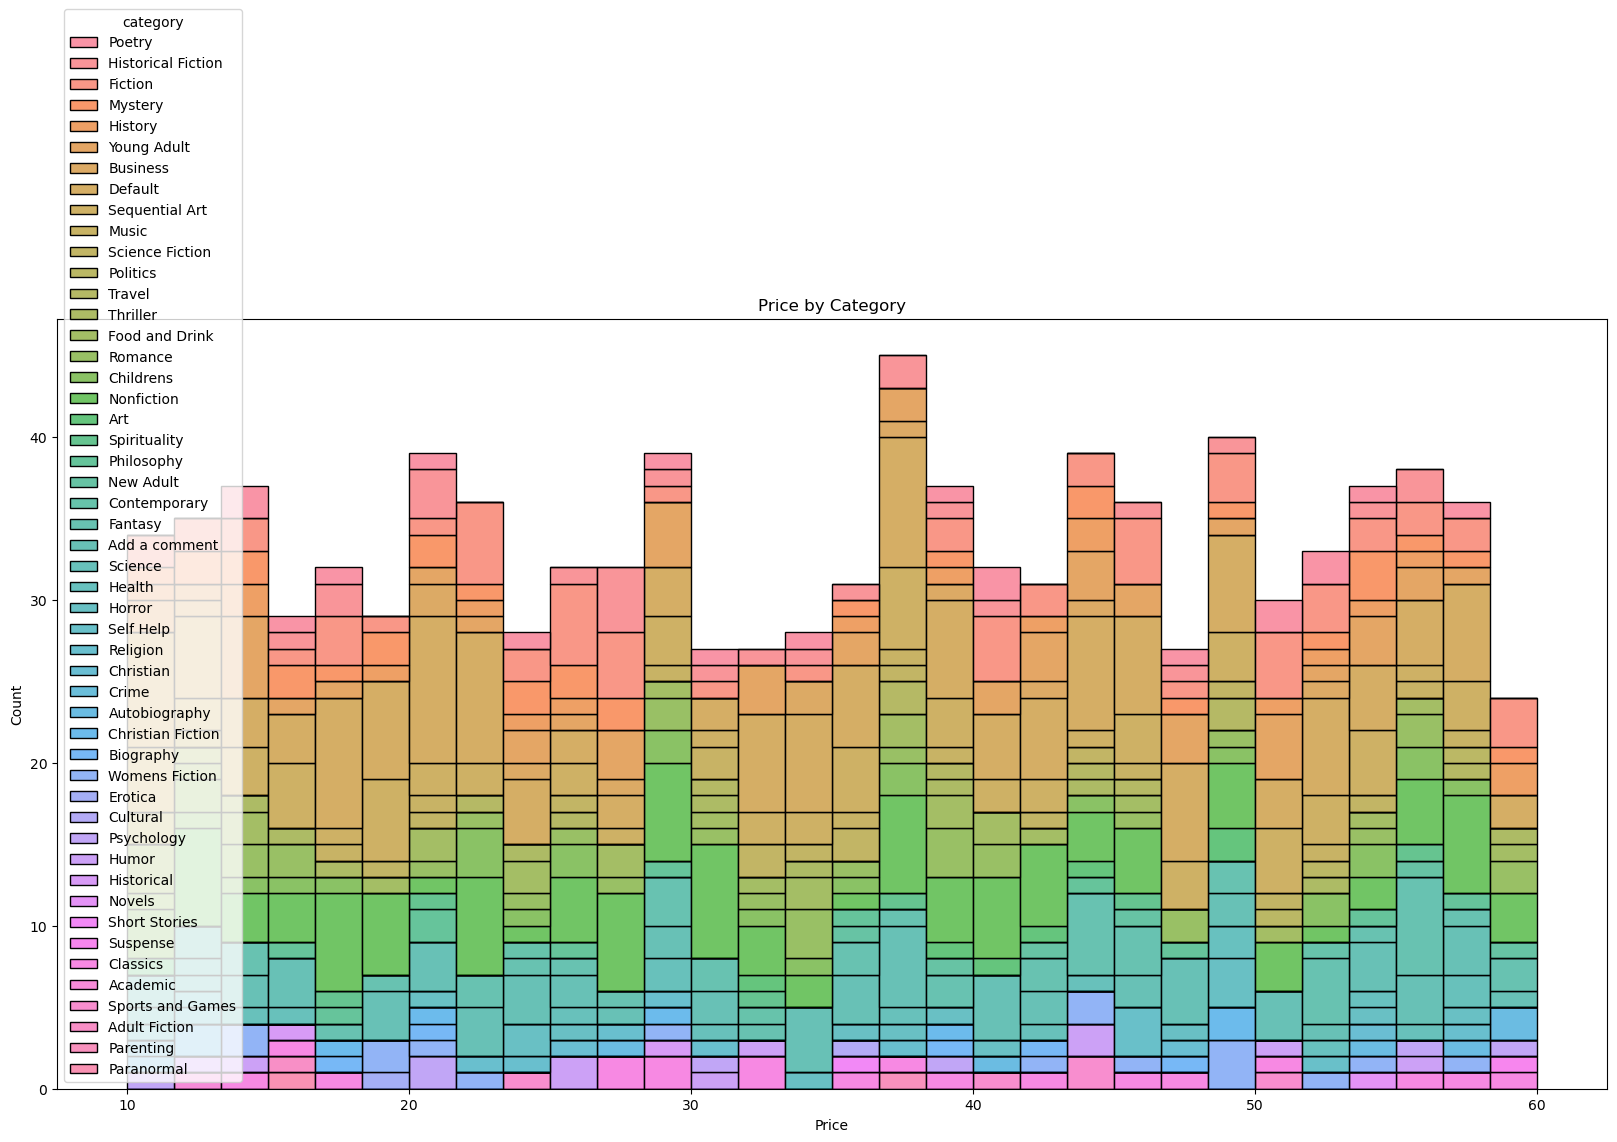

In [28]:
# print(df['category'].value_counts())
# print(df['category'].value_counts(normalize=True) * 100)

plt.figure(figsize=(20,10))
plt.title("Price by Category")

plt.xlabel("Price")
plt.ylabel("Count")
sns.histplot(data=df, x="price", hue="category", multiple="stack", bins=30)

plt.show()

# Box plot: price spread by category

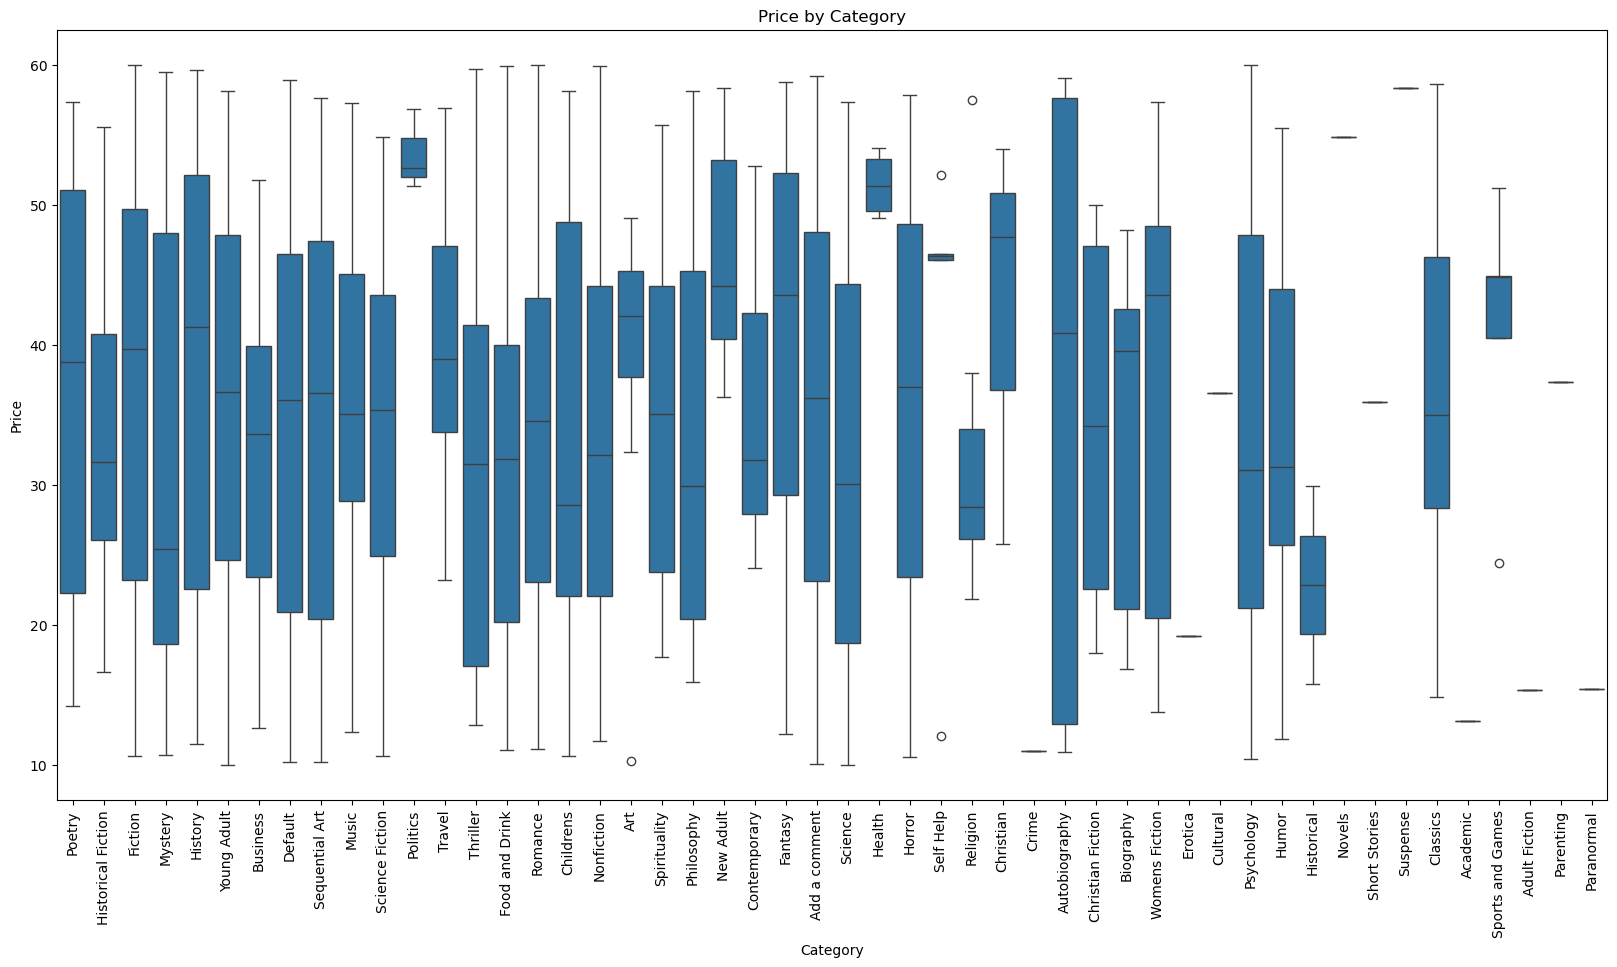

In [31]:
plt.figure(figsize=(20,10))
plt.title("Price by Category")
plt.xlabel("Category")
plt.ylabel("Price")
sns.boxplot(data=df, x="category", y="price")
plt.xticks(rotation=90)
plt.show()

# Rating vs price scatter plots with trend lines

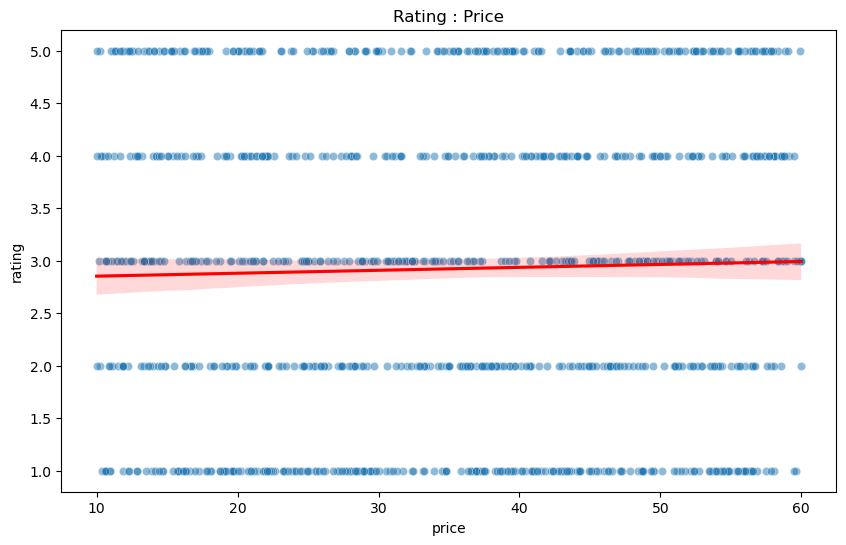

In [37]:
plt.figure(figsize=(10,6))
plt.title("Rating : Price")
plt.xlabel("Price")
plt.ylabel("Rating")

#  price:rating scatter plt
sns.scatterplot(data=df, x="price", y="rating", alpha=0.5)
# trend line
sns.regplot(data=df, x="price", y="rating", scatter=False, color="red")
plt.show()

# Bar chart showing category popularity

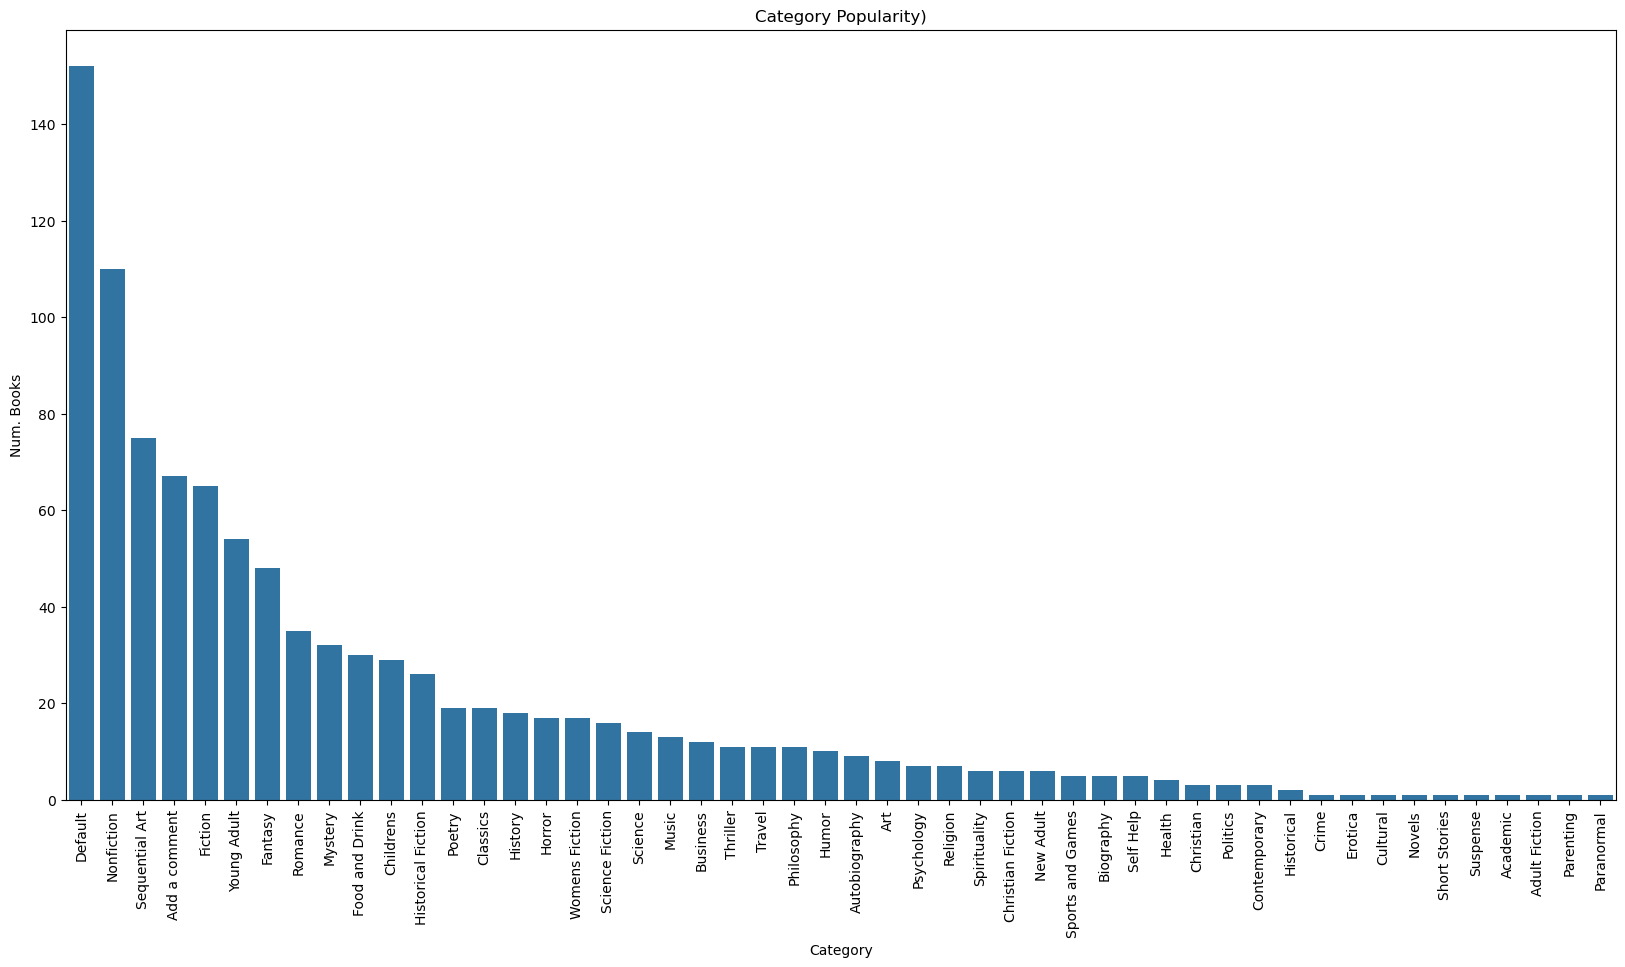

In [43]:
plt.figure(figsize=(20,10))
plt.title("Category Popularity)")
plt.xlabel("Category")
plt.ylabel("Num. Books")

category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
sns.barplot(data=category_counts, x='category', y='count')
plt.xticks(rotation=90)
plt.show()

# Bar chart showing category average rating

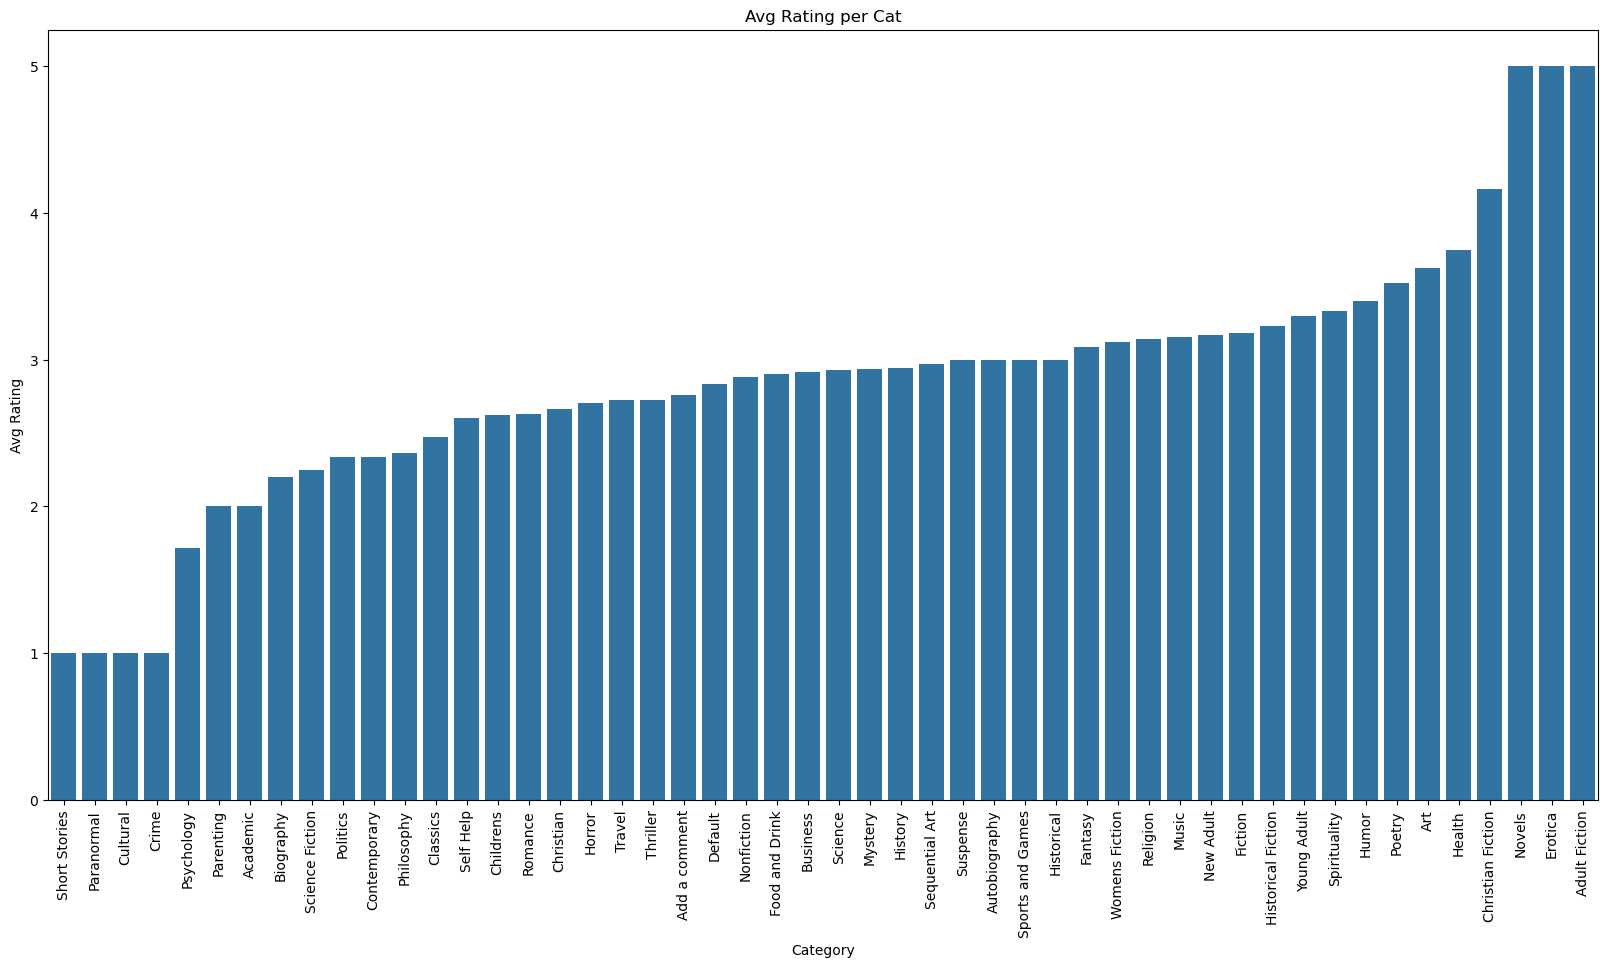

In [47]:

plt.figure(figsize=(20, 10))
plt.title("Avg Rating per Cat")
plt.xlabel("Category")
plt.ylabel("Avg Rating")
category_ratings = df.groupby('category')['rating'].mean().reset_index()
category_ratings = category_ratings.sort_values('rating')

sns.barplot(data=category_ratings, x='category', y='rating')
plt.xticks(rotation=90)
plt.show()

# Interactive plots using Plotly for filtering and exploration

In [54]:
import plotly.express as px
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

fig_popularity = px.bar(
    category_counts,
    x='category',
    y='count',
    title='Category Popularity',
    labels={'count': 'Book Count', 'category': 'Cat'},
)

fig_popularity.show()

# Average Rating per Category

In [85]:
import plotly.express as px
category_ratings_grouped = df.groupby('category')['rating']
category_ratings_mean_indexed = category_ratings_grouped.mean().reset_index()

category_ratings_sorted = category_ratings_mean_indexed.sort_values('rating')

fig_ratings = px.bar(
    category_ratings_sorted,
    x='category',
    y='rating',
    title='Avg Rating per Cat',
    labels={'rating': 'Avg Rating', 'category': 'Cat'},
    color='rating'
)
fig_ratings.update_layout(xaxis_tickangle=-45)
fig_ratings.show()